In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P5=advertisement\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df=df.drop("Unnamed: 0",axis=1)

In [7]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
df.shape

(200, 4)

In [10]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [13]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Univariant Analysis

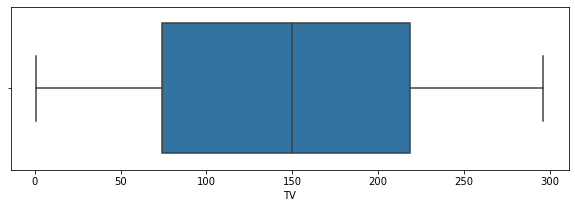

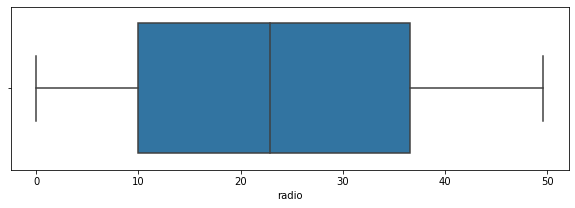

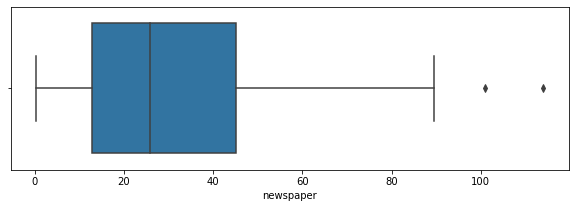

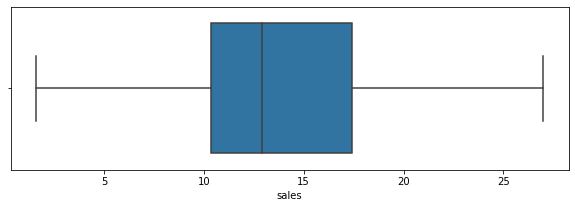

In [14]:
for column in df:
        plt.figure(figsize=(10,3))
        sn.boxplot(data=df, x=column)

There is not much outliers

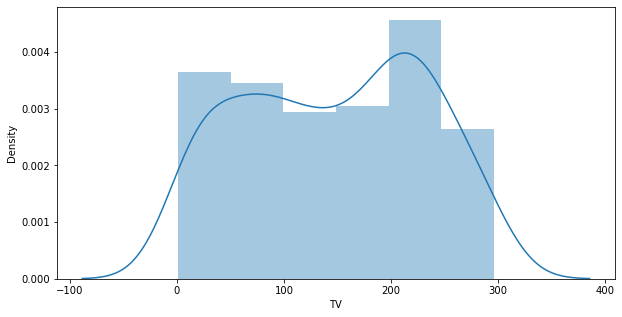

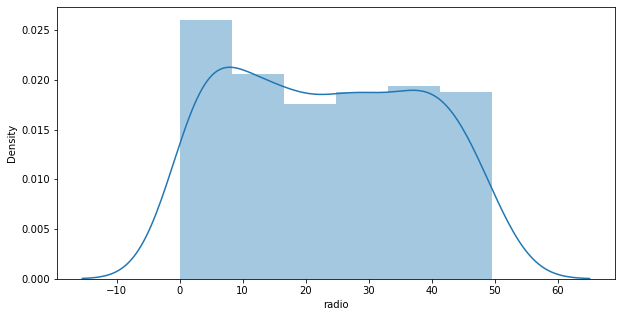

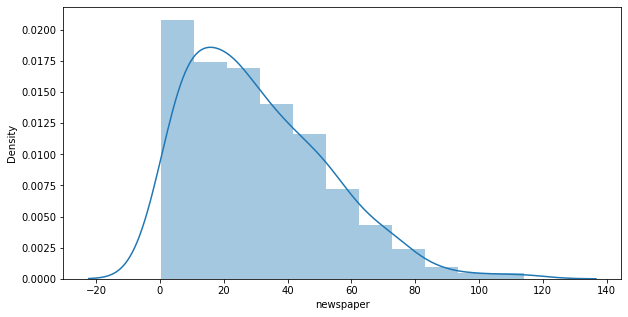

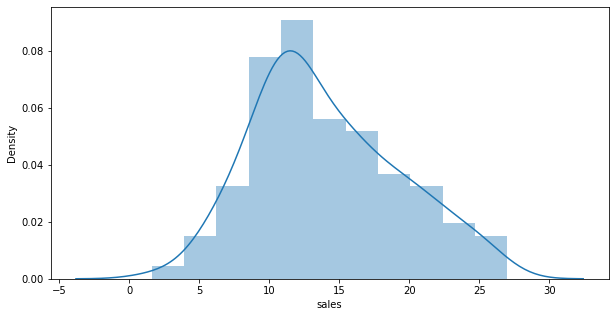

In [15]:
for column in df:
        plt.figure(figsize=(10,5))
        sn.distplot(df[column])

has some skewness

# BI-Variant Analysis

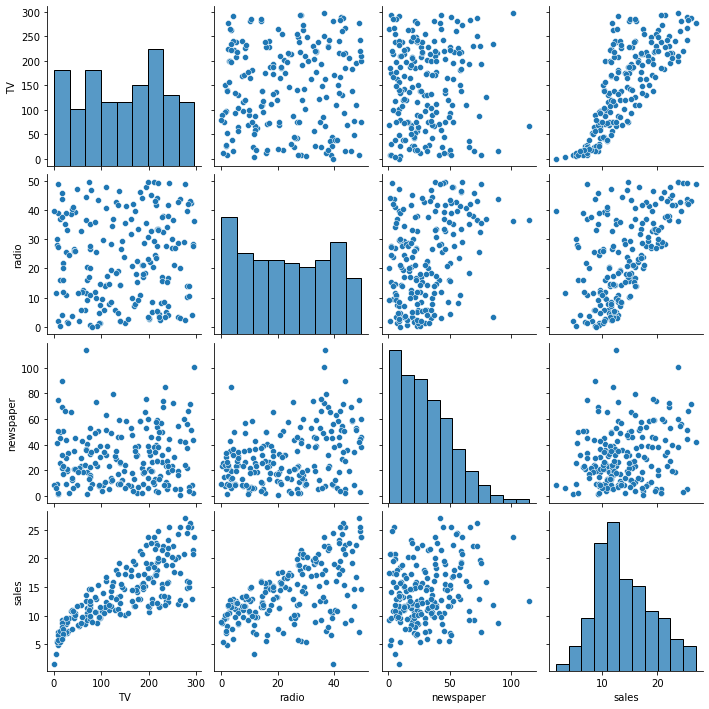

In [16]:
f=sn.pairplot(df)

In [17]:
cor=df.corr()

In [18]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

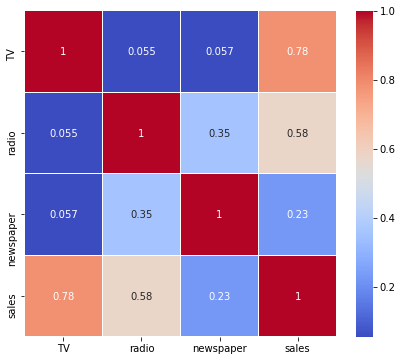

In [22]:
plt.figure(figsize=(7,6))
sn.heatmap(cor,linewidths=.1,cmap="coolwarm", annot=True)

# Skewness

In [23]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# newspaper

In [24]:
from scipy.stats import boxcox

In [25]:
n=boxcox(df["newspaper"])[0]
pd.Series(n).skew()

-0.08965131635982791

In [27]:
df["newspaper"]=n

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

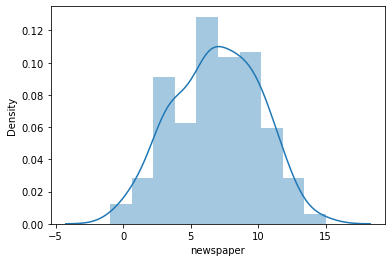

In [29]:
sn.distplot(df["newspaper"])

# Seperating The Target Variable And The Independent Variables

In [31]:
x=df.drop(["sales"],axis=1)

In [32]:
y=df["sales"]

# Training The Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [34]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.30,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [35]:
LR=LinearRegression()
regress(LR,x,y)

R2: 89.04875461134651
CV Score: 88.74145757211862
Diffrence: 0.3072970392278904


In [36]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 89.86573617986964
CV Score: 95.81648042364876
Diffrence: 5.950744243779113


In [37]:
RDG=Ridge()
regress(RDG,x,y)

R2: 89.04920136134182
CV Score: 88.74164885173472
Diffrence: 0.3075525096070919


In [38]:
LSO=Lasso()
regress(LSO,x,y)

R2: 89.34909218796268
CV Score: 88.91342630412223
Diffrence: 0.435665883840457


In [39]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 97.74580201631136
CV Score: 97.52788108264279
Diffrence: 0.2179209336685659


In [40]:
KNR=KNeighborsRegressor(n_neighbors=5, weights='distance')
regress(KNR,x,y)

R2: 95.55209002297417
CV Score: 96.50173353873403
Diffrence: 0.9496435157598597


# Hyper Parameter Tuning

In [115]:
# Select an algorithm
algorithm = RandomForestRegressor()

In [120]:
# Define our candidate hyperparameters
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [121]:
# Search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = algorithm,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.30,random_state=7)

In [123]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [124]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}  



In [126]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=True) 
randmf.fit( X_train, Y_train) 

RandomForestRegressor(max_depth=120)

# Now Running Again With Best Parameters

In [143]:
y_pred_rf1 = pd.DataFrame( { "actual": Y_test, 
"predicted_prob": randmf.predict( 
( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
86,12.0,11.544
120,15.5,14.987
22,5.6,7.407
11,17.4,17.130
195,7.6,9.223
...,...,...
150,16.1,14.834
70,18.3,19.193
166,8.0,8.517
111,21.8,20.941


# Saving The Model

In [147]:
import joblib
joblib.dump(randmf,r"C:\Users\Avinash\Desktop\Projects\P5=advertisement\Advertising.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P5=advertisement\\Advertising.pkl']